In [22]:
import pandas as pd
data=pd.read_csv('penguins_size.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


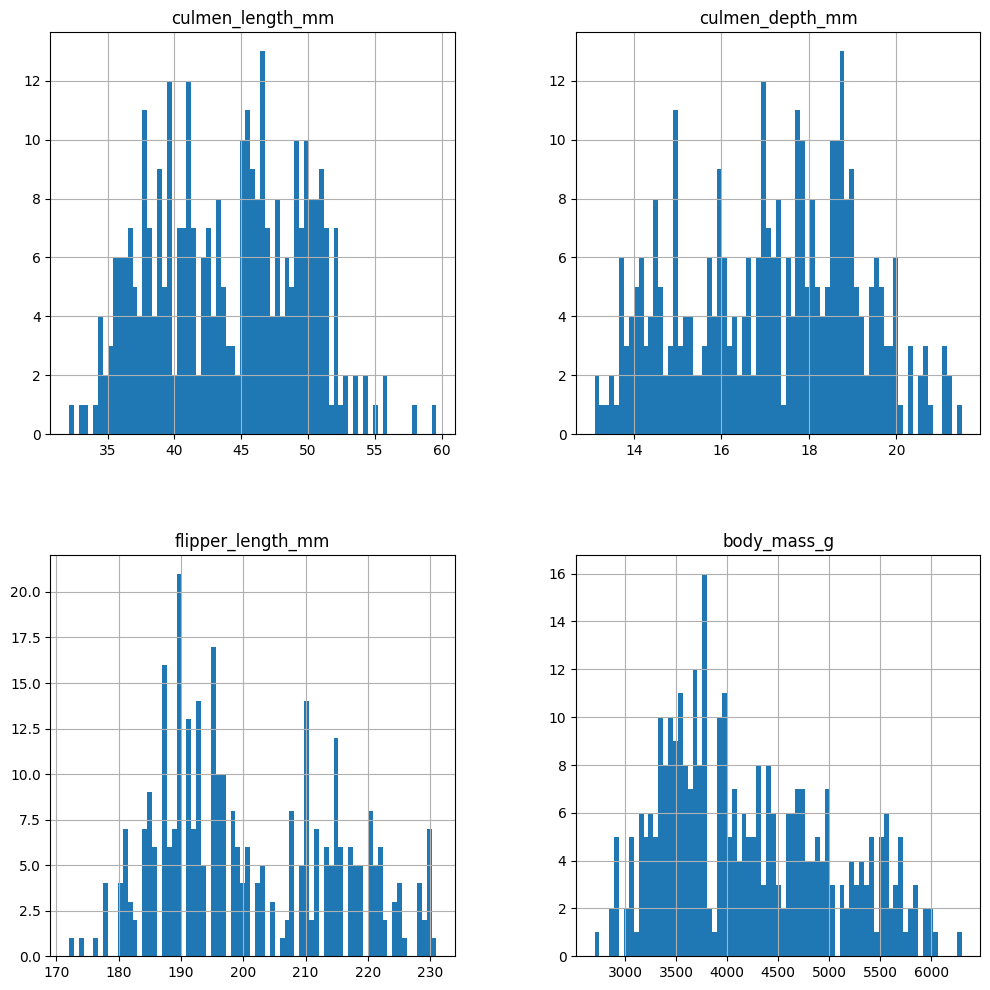

In [23]:
import matplotlib.pyplot as plt #Library required to make the plot
temp_data=data.dropna()#We will temporarily drop 'na' values so that we can replace appropriate values in cleaning
temp_data.hist(bins=75,figsize=(12,12))#defining our figure
plt.show()

In [24]:
data.isna().sum()#this will give us total number of null values in data in each column

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [25]:
data.median()#This will give us meadian of each column

<ipython-input-25-e25b86f2ccc1>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.median()#This will give us meadian of each column


culmen_length_mm       44.45
culmen_depth_mm        17.30
flipper_length_mm     197.00
body_mass_g          4050.00
dtype: float64

In [26]:
data.mean()

<ipython-input-26-abc01cf6c622>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


culmen_length_mm       43.921930
culmen_depth_mm        17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
dtype: float64

In [27]:
data.mode()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,MALE


Now since 'sex' is a categorical column, we need to replace missing values with mode, and for others since the data is skewed we will use median to replace the data.

In [29]:
print(data.iloc[:,2:6])#this means we are taking all rows and column 2 and 6 of data
data.iloc[:,2:6]=data.iloc[:,2:6].fillna(data.iloc[:2,3].median())#this will replace all missing values with median
print(data.isna().sum())#this will check if all the values have been replaced or not

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0               39.10             18.7              181.0       3750.0
1               39.50             17.4              186.0       3800.0
2               40.30             18.0              195.0       3250.0
3               18.05              NaN                NaN          NaN
4               36.70             19.3              193.0       3450.0
..                ...              ...                ...          ...
339             18.05              NaN                NaN          NaN
340             46.80             14.3              215.0       4850.0
341             50.40             15.7              222.0       5750.0
342             45.20             14.8              212.0       5200.0
343             49.90             16.1              213.0       5400.0

[344 rows x 4 columns]
species               0
island                0
culmen_length_mm      0
culmen_depth_mm       0
flipper_length_mm     0
body

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [31]:
data.iloc[:,6:7]=data.fillna(data.iloc[:,6:7].mode())
data.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Before going to check outliers we need to ensure that our data is either in integer or in float formate, so for that we are going to convert all the object type data to integer type using label encoder

In [32]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
data['species']=le.fit_transform(data['species'])
data['island']=le.fit_transform(data['island'])
data['sex']=le.fit_transform(data['sex'])
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10,18.70,181.00,3750.00,0
1,0,2,39.50,17.40,186.00,3800.00,0
2,0,2,40.30,18.00,195.00,3250.00,0
3,0,2,18.05,18.05,18.05,18.05,0
4,0,2,36.70,19.30,193.00,3450.00,0
...,...,...,...,...,...,...,...
339,2,0,18.05,18.05,18.05,18.05,2
340,2,0,46.80,14.30,215.00,4850.00,2
341,2,0,50.40,15.70,222.00,5750.00,2
342,2,0,45.20,14.80,212.00,5200.00,2


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    int64  
 1   island             344 non-null    int64  
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 18.9 KB


In [63]:
data.nunique()

species                3
island                 3
culmen_length_mm     166
culmen_depth_mm       81
flipper_length_mm     55
body_mass_g           96
sex                    3
dtype: int64

Now we will check for outliers, we can do it by couple of methods, that are using quertaile method or z-score, I am going to use quartile method here, however it is equally good to use z-score.

<generator object DataFrame.items at 0x79afcbad0040>


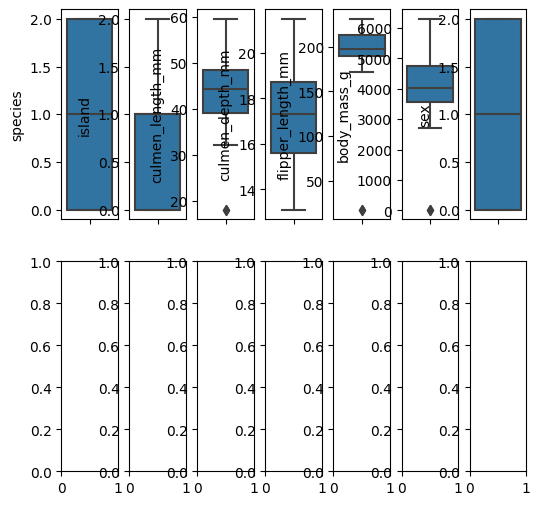

In [35]:
'''
before replacing data, we will look at box plot for data so that we can have vizualization of outliers
'''
import seaborn as sns #Seaborn is the libarary required for our box blot


fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(6,6))#Here we give the size of image simpilar to what we did in histogram
index = 0#This to keep track of all the columns
axs = axs.flatten()
print(data.items())
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])#This is actually making the plot for us
    index += 1


now we will see what percentage of data of belongs to outliers

In [36]:
import numpy as np
lower_bound=0
upper_bound=0
for k, v in data.items():
        quantile_1 = v.quantile(0.25)#THis will take 25% of lowest values in each column
        quantile_3 = v.quantile(0.75)#This will take 25% of hightest values in each columns
        inter_quantile_range = quantile_3 - quantile_1#Inter quantile range is simply the difference between 25% highest and 25% lowest values
        v_col = v[(v <= quantile_1 - 1.5 * inter_quantile_range) | (v >= quantile_3 + 1.5 * inter_quantile_range)] #Basically if it is higher than top 25% quartile + 1.5 times quartile range or if it is lower than bottom 25% quartile - 1.5 times of IQR we call it a outlier
        percentage_of_outliers = np.shape(v_col)[0] / np.shape(data)[0]
        print(k,end=" : ")
        print(percentage_of_outliers*100)

species : 0.0
island : 0.0
culmen_length_mm : 0.5813953488372093
culmen_depth_mm : 0.0
flipper_length_mm : 0.5813953488372093
body_mass_g : 0.5813953488372093
sex : 0.0


So basically what this tells is that 0.5% of data in three of our columns is an outlier, so we will replace it by median

In [37]:
'''
To do that we will have to see upper and lower bound of data, and then see which one of them is outlier, so first we will find upper and lower bound for all three of these columns
'''
lower_bound_cl=0
upper_bound_cl=0

lower_bound_fl=0
upper_bound_fl=0

lower_bound_bm=0
upper_bound_bm=0
for k, v in data.items():
        quantile_1 = v.quantile(0.25)#THis will take 25% of lowest values in each column
        quantile_3 = v.quantile(0.75)#This will take 25% of hightest values in each columns
        inter_quantile_range = quantile_3 - quantile_1#Inter quantile range is simply the difference between 25% highest and 25% lowest values
        v_col = v[(v <= quantile_1 - 1.5 * inter_quantile_range) | (v >= quantile_3 + 1.5 * inter_quantile_range)] #Basically if it is higher than top 25% quartile + 1.5 times quartile range or if it is lower than bottom 25% quartile - 1.5 times of IQR we call it a outlier
        if(k=='culmen_length_mm'):
          lower_bound_cl=quantile_1-1.5*inter_quantile_range
          upper_bound_cl=quantile_3+1.5*inter_quantile_range
        elif(k=='flipper_length_mm'):
          lower_bound_fl=quantile_1-1.5*inter_quantile_range
          upper_bound_fl=quantile_3+1.5*inter_quantile_range
        elif(k=='body_mass_g'):
          lower_bound_bm=quantile_1-1.5*inter_quantile_range
          upper_bound_bm=quantile_3+1.5*inter_quantile_range

In [41]:
for i in range(0,len(data['body_mass_g'])):
  data['culmen_length_mm'][i]=data['culmen_length_mm'][i] if data['culmen_length_mm'][i]>lower_bound_cl and data['culmen_length_mm'][i]<upper_bound_cl else data['culmen_length_mm'].median()
  data['flipper_length_mm'][i]=data['flipper_length_mm'][i] if data['flipper_length_mm'][i]>lower_bound_fl and data['flipper_length_mm'][i]<upper_bound_fl else data['flipper_length_mm'].median()
  data['body_mass_g'][i]=data['body_mass_g'][i] if data['body_mass_g'][i]>lower_bound_bm and data['body_mass_g'][i]<upper_bound_bm else data['body_mass_g'].median()

<ipython-input-41-164b9a23433e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['culmen_length_mm'][i]=data['culmen_length_mm'][i] if data['culmen_length_mm'][i]>lower_bound_cl and data['culmen_length_mm'][i]<upper_bound_cl else data['culmen_length_mm'].median()
<ipython-input-41-164b9a23433e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['flipper_length_mm'][i]=data['flipper_length_mm'][i] if data['flipper_length_mm'][i]>lower_bound_fl and data['flipper_length_mm'][i]<upper_bound_fl else data['flipper_length_mm'].median()
<ipython-input-41-164b9a23433e>:4: SettingWithCopyWarning: 
A value is trying to be

In [42]:
lower_bound=0
upper_bound=0
for k, v in data.items():
        quantile_1 = v.quantile(0.25)#THis will take 25% of lowest values in each column
        quantile_3 = v.quantile(0.75)#This will take 25% of hightest values in each columns
        inter_quantile_range = quantile_3 - quantile_1#Inter quantile range is simply the difference between 25% highest and 25% lowest values
        v_col = v[(v <= quantile_1 - 1.5 * inter_quantile_range) | (v >= quantile_3 + 1.5 * inter_quantile_range)] #Basically if it is higher than top 25% quartile + 1.5 times quartile range or if it is lower than bottom 25% quartile - 1.5 times of IQR we call it a outlier
        percentage_of_outliers = np.shape(v_col)[0] / np.shape(data)[0]
        print(k,end=" : ")
        print(percentage_of_outliers*100)

species : 0.0
island : 0.0
culmen_length_mm : 0.0
culmen_depth_mm : 0.0
flipper_length_mm : 0.0
body_mass_g : 0.0
sex : 0.0


as we can see our outliers are cleared now sow e can go ahead and check how each variable affects our target variable, for that we will have to use correlation matrix

In [43]:
corr_matrix=data.corr()#This will return the correlation matrix which will include all the columns
corr_matrix

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
species,1.000000,-0.635659,0.728745,-0.740645,0.850819,0.747565,1.000000
island,-0.635659,1.000000,-0.351330,0.568399,-0.562957,-0.558611,-0.635659
culmen_length_mm,0.728745,-0.351330,1.000000,-0.234730,0.655916,0.594941,0.728745
culmen_depth_mm,-0.740645,0.568399,-0.234730,1.000000,-0.584105,-0.472132,-0.740645
flipper_length_mm,0.850819,-0.562957,0.655916,-0.584105,1.000000,0.871235,0.850819
body_mass_g,0.747565,-0.558611,0.594941,-0.472132,0.871235,1.000000,0.747565
sex,1.000000,-0.635659,0.728745,-0.740645,0.850819,0.747565,1.000000


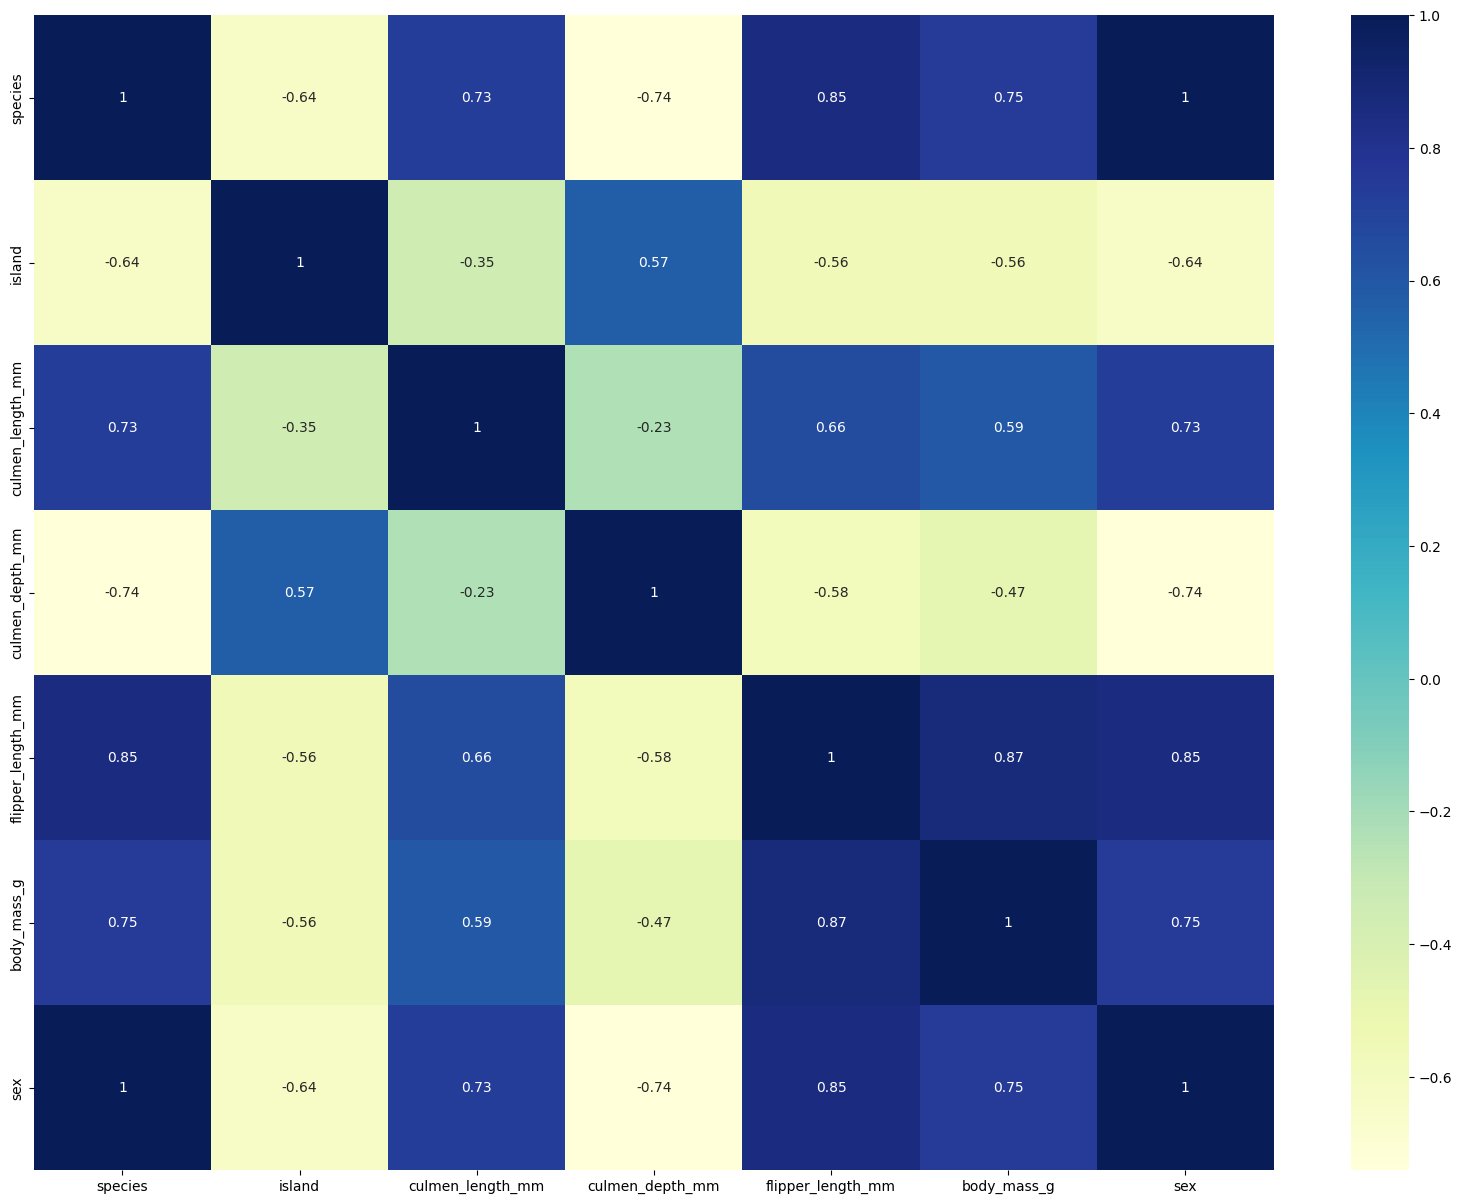

In [44]:
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)# we can make this using our seaborn library
plt.show()

In [45]:
x=data.drop(columns='species')#We will seprate our target variable from rest of data set
y=data['species']#Now our 'x' contains all the features and 'y' contains target variable
from sklearn.model_selection import train_test_split #We can use existing module of sklearn to make this split so we will import that
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)#Now this means that our data will be split into a ratio of 80:20 we can also take 70:30 but here we will go with standard 80-20 split
#Note that random_state has been fixed just for reproducablity reasons it can also be changed but with that the value of accuracy is also subjected to change slightly

In [47]:
'''
Now we need to scale our data
'''

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [46]:
# Now we will do model selection
!pip install lazypredict

In [52]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric = None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)

 10%|█         | 3/29 [00:00<00:03,  8.14it/s]

ROC AUC couldn't be calculated for AdaBoostClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for BaggingClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for BernoulliNB
multi_class must be in ('ovo', 'ovr')


 28%|██▊       | 8/29 [00:00<00:01, 14.12it/s]

ROC AUC couldn't be calculated for CalibratedClassifierCV
multi_class must be in ('ovo', 'ovr')
CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)
ROC AUC couldn't be calculated for DecisionTreeClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for DummyClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for ExtraTreeClassifier
multi_class must be in ('ovo', 'ovr')


 41%|████▏     | 12/29 [00:01<00:01, 11.18it/s]

ROC AUC couldn't be calculated for ExtraTreesClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for GaussianNB
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for KNeighborsClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LabelPropagation
multi_class must be in ('ovo', 'ovr')


 59%|█████▊    | 17/29 [00:01<00:00, 15.99it/s]

ROC AUC couldn't be calculated for LabelSpreading
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LinearDiscriminantAnalysis
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LinearSVC
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LogisticRegression
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for NearestCentroid
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for NuSVC
multi_class must be in ('ovo', 'ovr')


 69%|██████▉   | 20/29 [00:01<00:00, 17.93it/s]

ROC AUC couldn't be calculated for PassiveAggressiveClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for Perceptron
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for QuadraticDiscriminantAnalysis
multi_class must be in ('ovo', 'ovr')


 86%|████████▌ | 25/29 [00:02<00:00, 13.79it/s]

ROC AUC couldn't be calculated for RandomForestClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for RidgeClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for RidgeClassifierCV
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for SGDClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for SVC
multi_class must be in ('ovo', 'ovr')
StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'


 97%|█████████▋| 28/29 [00:02<00:00, 15.72it/s]

ROC AUC couldn't be calculated for XGBClassifier
multi_class must be in ('ovo', 'ovr')
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 238
[LightGBM] [Info] Number of data points in the train set: 275, number of used features: 6
[LightGBM] [Info] Start training from score -0.829279
[LightGBM] [Info] Start training from score -1.539234
[LightGBM] [Info] Start training from score -1.052423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

100%|██████████| 29/29 [00:02<00:00, 12.22it/s]

ROC AUC couldn't be calculated for LGBMClassifier
multi_class must be in ('ovo', 'ovr')


In [53]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,None,1.00,0.31
BaggingClassifier,1.00,1.00,None,1.00,0.08
XGBClassifier,1.00,1.00,None,1.00,0.11
SVC,1.00,1.00,None,1.00,0.03
SGDClassifier,1.00,1.00,None,1.00,0.04
RidgeClassifierCV,1.00,1.00,None,1.00,0.04
RidgeClassifier,1.00,1.00,None,1.00,0.03
RandomForestClassifier,1.00,1.00,None,1.00,0.34
PassiveAggressiveClassifier,1.00,1.00,None,1.00,0.05


In [54]:
'''
since almost all of the models give perfect accuracy and f1 scores we can pick anyone of them, I am going to pick XGB Regression, also we don't need to tune hyper parmeters because we already have very high accuracy
'''
import xgboost as xgb

model_xgb = xgb.XGBClassifier()

model_xgb = model_xgb.fit(x_train_scaled,y_train)

pred_xgb = model_xgb.predict(x_test_scaled)

In [60]:
'''
to evaluate it we will use recall_score and confusion matrix
'''

from sklearn.metrics import recall_score
recall=recall_score(pred_xgb,y_test,pos_label='positive',average='micro')
recall

1.0

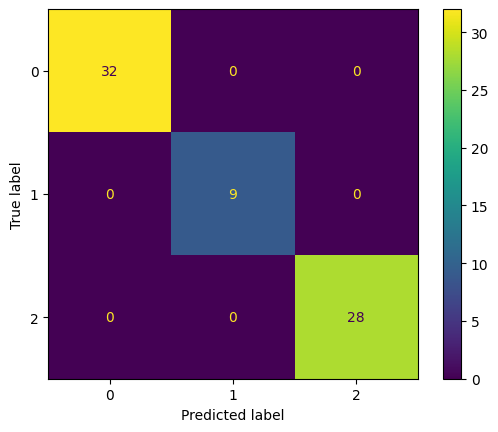

In [64]:

from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, pred_xgb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1,2])
cm_display.plot()
plt.show()


The confusion matrix shows that our model is perfect